# Housing Regression Kaggle Competition
This is a notebook for my submissions based on the following [Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

Given 79 features about residential homes in Iowa (as well as their sale prices), the goal is to predict the price of future homes. 

## Data
We are given two files. $\texttt{train.csv}$ from which our model is trained on, and $\texttt{test.csv}$ from which we make predictions that are submitted. 

## Evaluation
From the list of predicted house prices, our predictions will be scored by taking the RMSE between the logarithm of the predicted sales price and the logarithm of the observed sales price.

## Other
This notebook is meant to be a condensed version of all the work. All files used can be found [here](https://github.com/fattorib/HousingRegression).

# Exploratory Data Analysis
Here, we take a first look at $\texttt{train.csv}$. 

In [479]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
pd.options.display.max_rows = 200
pd.options.display.max_columns = 220

In [480]:
file_path = 'train_fix.csv'
raw_df = pd.read_csv(file_path)
    
#Getting price data for training
prices = raw_df['SalePrice']
    
attributes_with_price = raw_df.drop(['Id'],axis = 1)

attributes_with_price

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CemntBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

## Missing Data


In [481]:
missing = attributes_with_price.isnull().sum().sort_values(ascending=False)
percent = (attributes_with_price.isnull().sum()/attributes_with_price.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])

In [482]:
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


From this we can see that there are many attributes that are missing. While we will not deal with these missing values now, we will come back to these later during our feature engineering stage, as it is possible that some of these features may not be highly correlated with the sales price. 

## Price Distribution

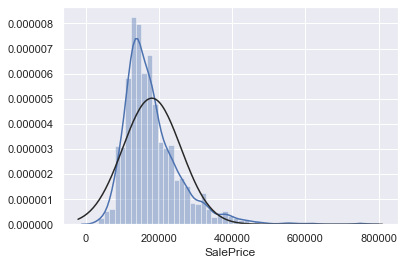

In [483]:
from scipy.stats import norm

%matplotlib inline
sns.distplot(prices,fit = norm)

The price distribution is heavily skewed. When we move to the feature engineering stage, we will need to apply a $\log$ transform. 

From a quick look at $\texttt{train.csv}$, we see that the features are a mix of numerical (Square footage of floors, etc), categorical (Neighbourhood, building type, etc), and ordinal (quality of exterior, quality of basement, etc). When feature engineering, we will have to encode the categorical and ordinal features.


## Numerical Features
The following are a list of all numerical features. 


In [484]:
numerical_features = ['SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
                      'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                      'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                      'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                      'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']

Let's take a look at some of the distributions of these values. Like 'SalePrice', some of them may be skewed. 

C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidt

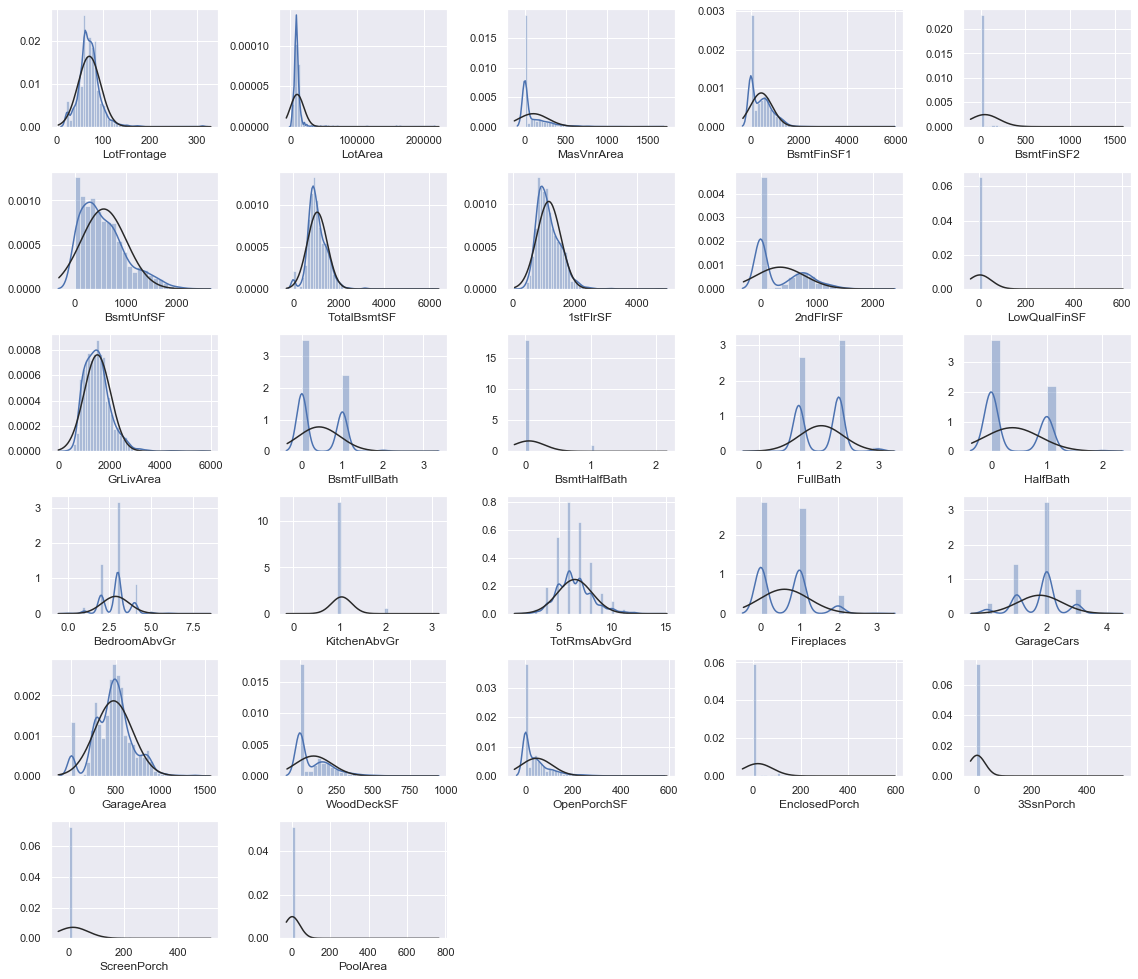

In [485]:
%matplotlib inline
fig = plt.figure(figsize=(16,20))
for i in range(len(numerical_features)-1):
    fig.add_subplot(9, 5, i+1)
    feat = numerical_features[i+1]
    sns.distplot(attributes_with_price[feat],fit = norm)

plt.tight_layout()
plt.show()

Now, we can try to normalize the distributions using the transformation $x \rightarrow \log(x+1)$.

C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidt

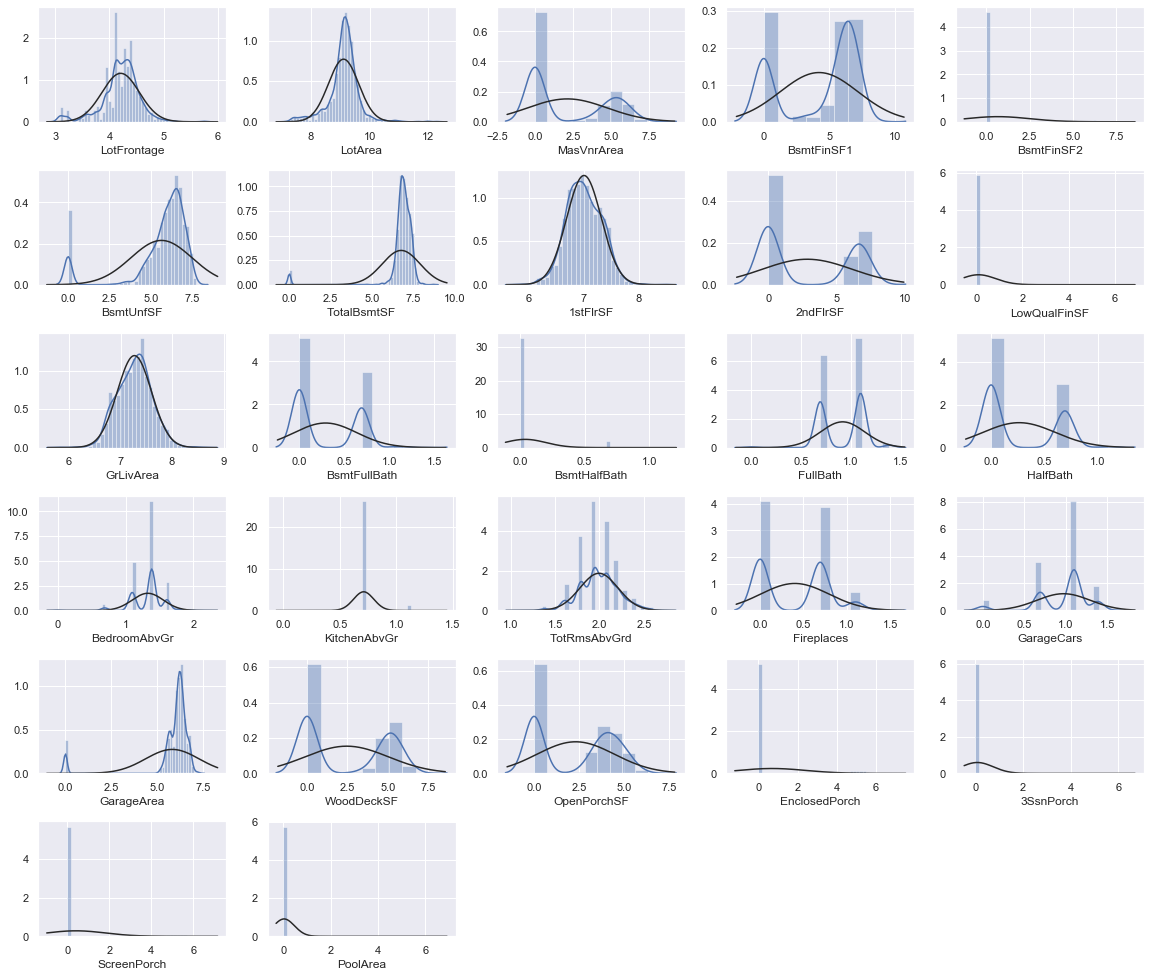

In [486]:
%matplotlib inline
fig = plt.figure(figsize=(16,20))
for i in range(len(numerical_features)-1):
    fig.add_subplot(9, 5, i+1)
    feat = numerical_features[i+1]
    sns.distplot(np.log1p(attributes_with_price[feat]),fit = norm)

plt.tight_layout()
plt.show()

We could also try the Box-Cox transform. 

C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Ben\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidt

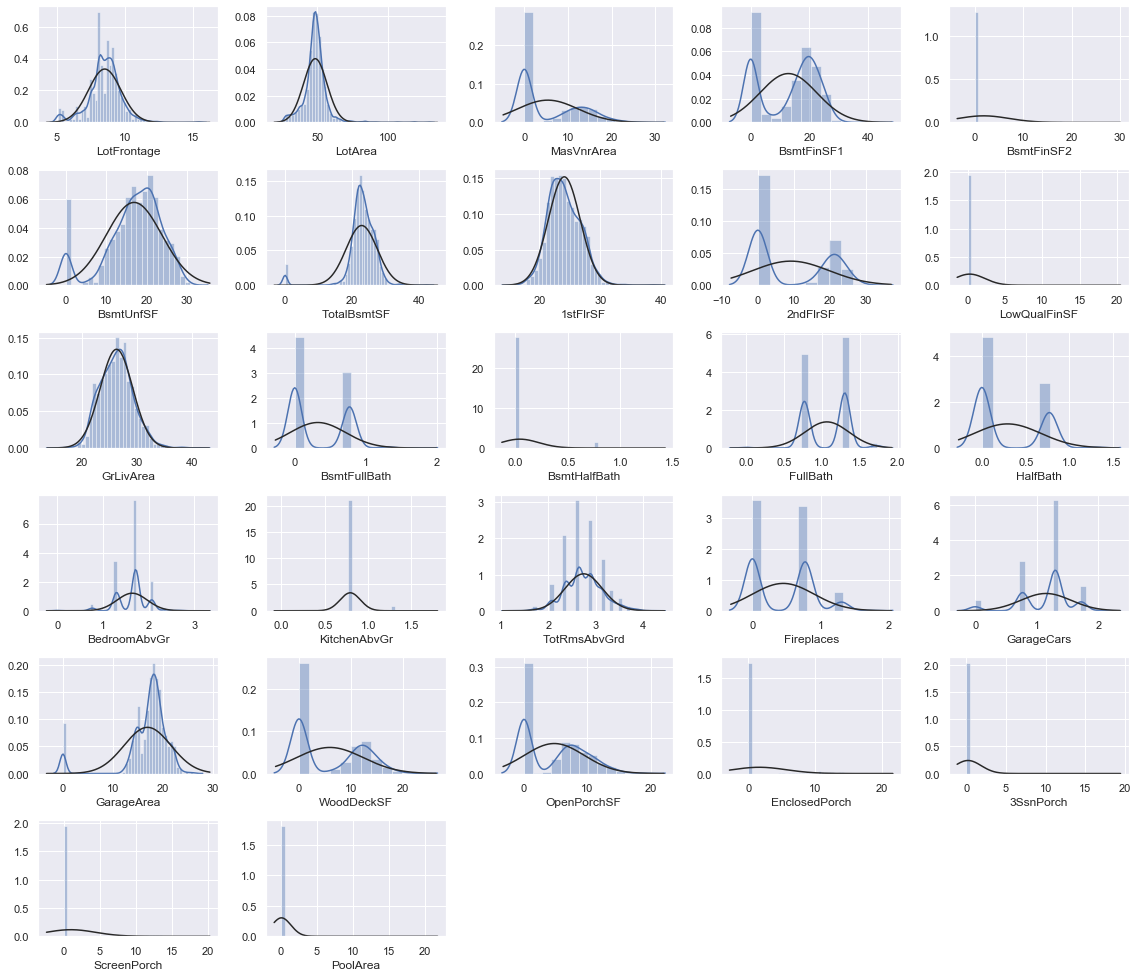

In [487]:
from scipy.special import boxcox1p
lam = 0.30

%matplotlib inline
fig = plt.figure(figsize=(16,20))
for i in range(len(numerical_features)-1):
    fig.add_subplot(9, 5, i+1)
    feat = numerical_features[i+1]
    sns.distplot(boxcox1p(attributes_with_price[feat],lam),fit = norm)

plt.tight_layout()
plt.show()

## WORK IN PROGRESS, COME BACK TO LATER

## Categorical Features
The following are a list of all categorical features.


In [488]:
categorical_features = ['MSSubClass', 'MSZoning','Street','Alley','LotShape','LandContour','Utilities',
                        'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
                        'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                        'Foundation','BsmtFinType1','BsmtFinType2','Heating','Electrical','Fence',
                        'MiscFeature','SaleType','SaleCondition']

Something to note is that while $\texttt{MSSubClass}$ takes numerical values, it is actually a categorical feature! We will need to watch out for this later. 

## Ordinal Features
Finally, a list of all the ordinal features. These are mostly just quality ratings for different features of the house. 

In [489]:
ordinal_features = ['YearBuilt','YearRemodAdd','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
                    'HeatingQC','KitchenQual','Functional','FireplaceQu','GarageQual','GarageCond','PoolQC']

## Other groupings
Alternatively, we can group features by what they are describing. For example, we could consider all basement features,garage features, or area features.


In [490]:
basement_features = ['SalePrice','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                     'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
garage_features = ['SalePrice','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea',
                   'GarageQual','GarageCond']
area_features = ['SalePrice','LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                 'LowQualFinSF','GrLivArea','WoodDeckSF','OpenPorchSF']

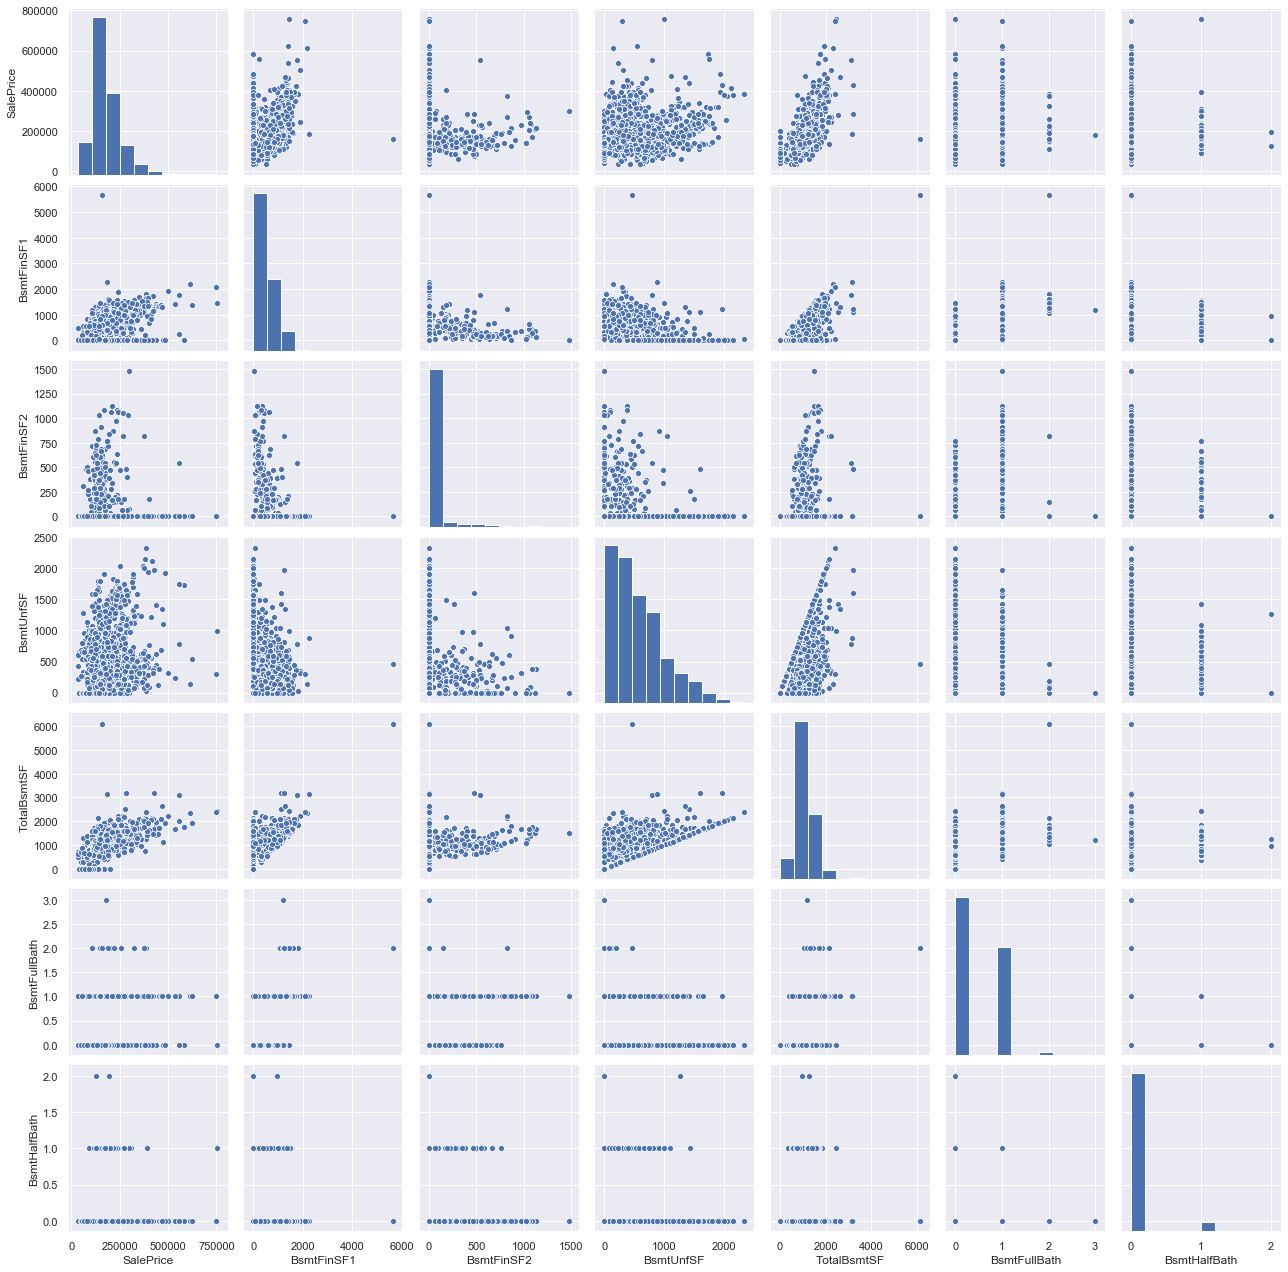

In [491]:
%matplotlib inline
basement_df = attributes_with_price[basement_features]
sns.pairplot(basement_df)

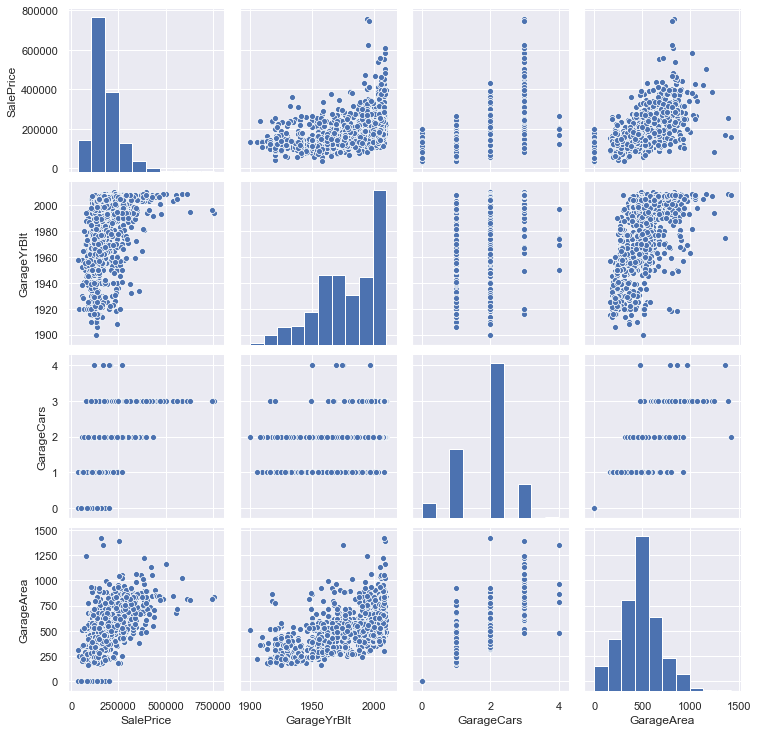

In [492]:
%matplotlib inline
garage_df = attributes_with_price[garage_features]
sns.pairplot(garage_df)

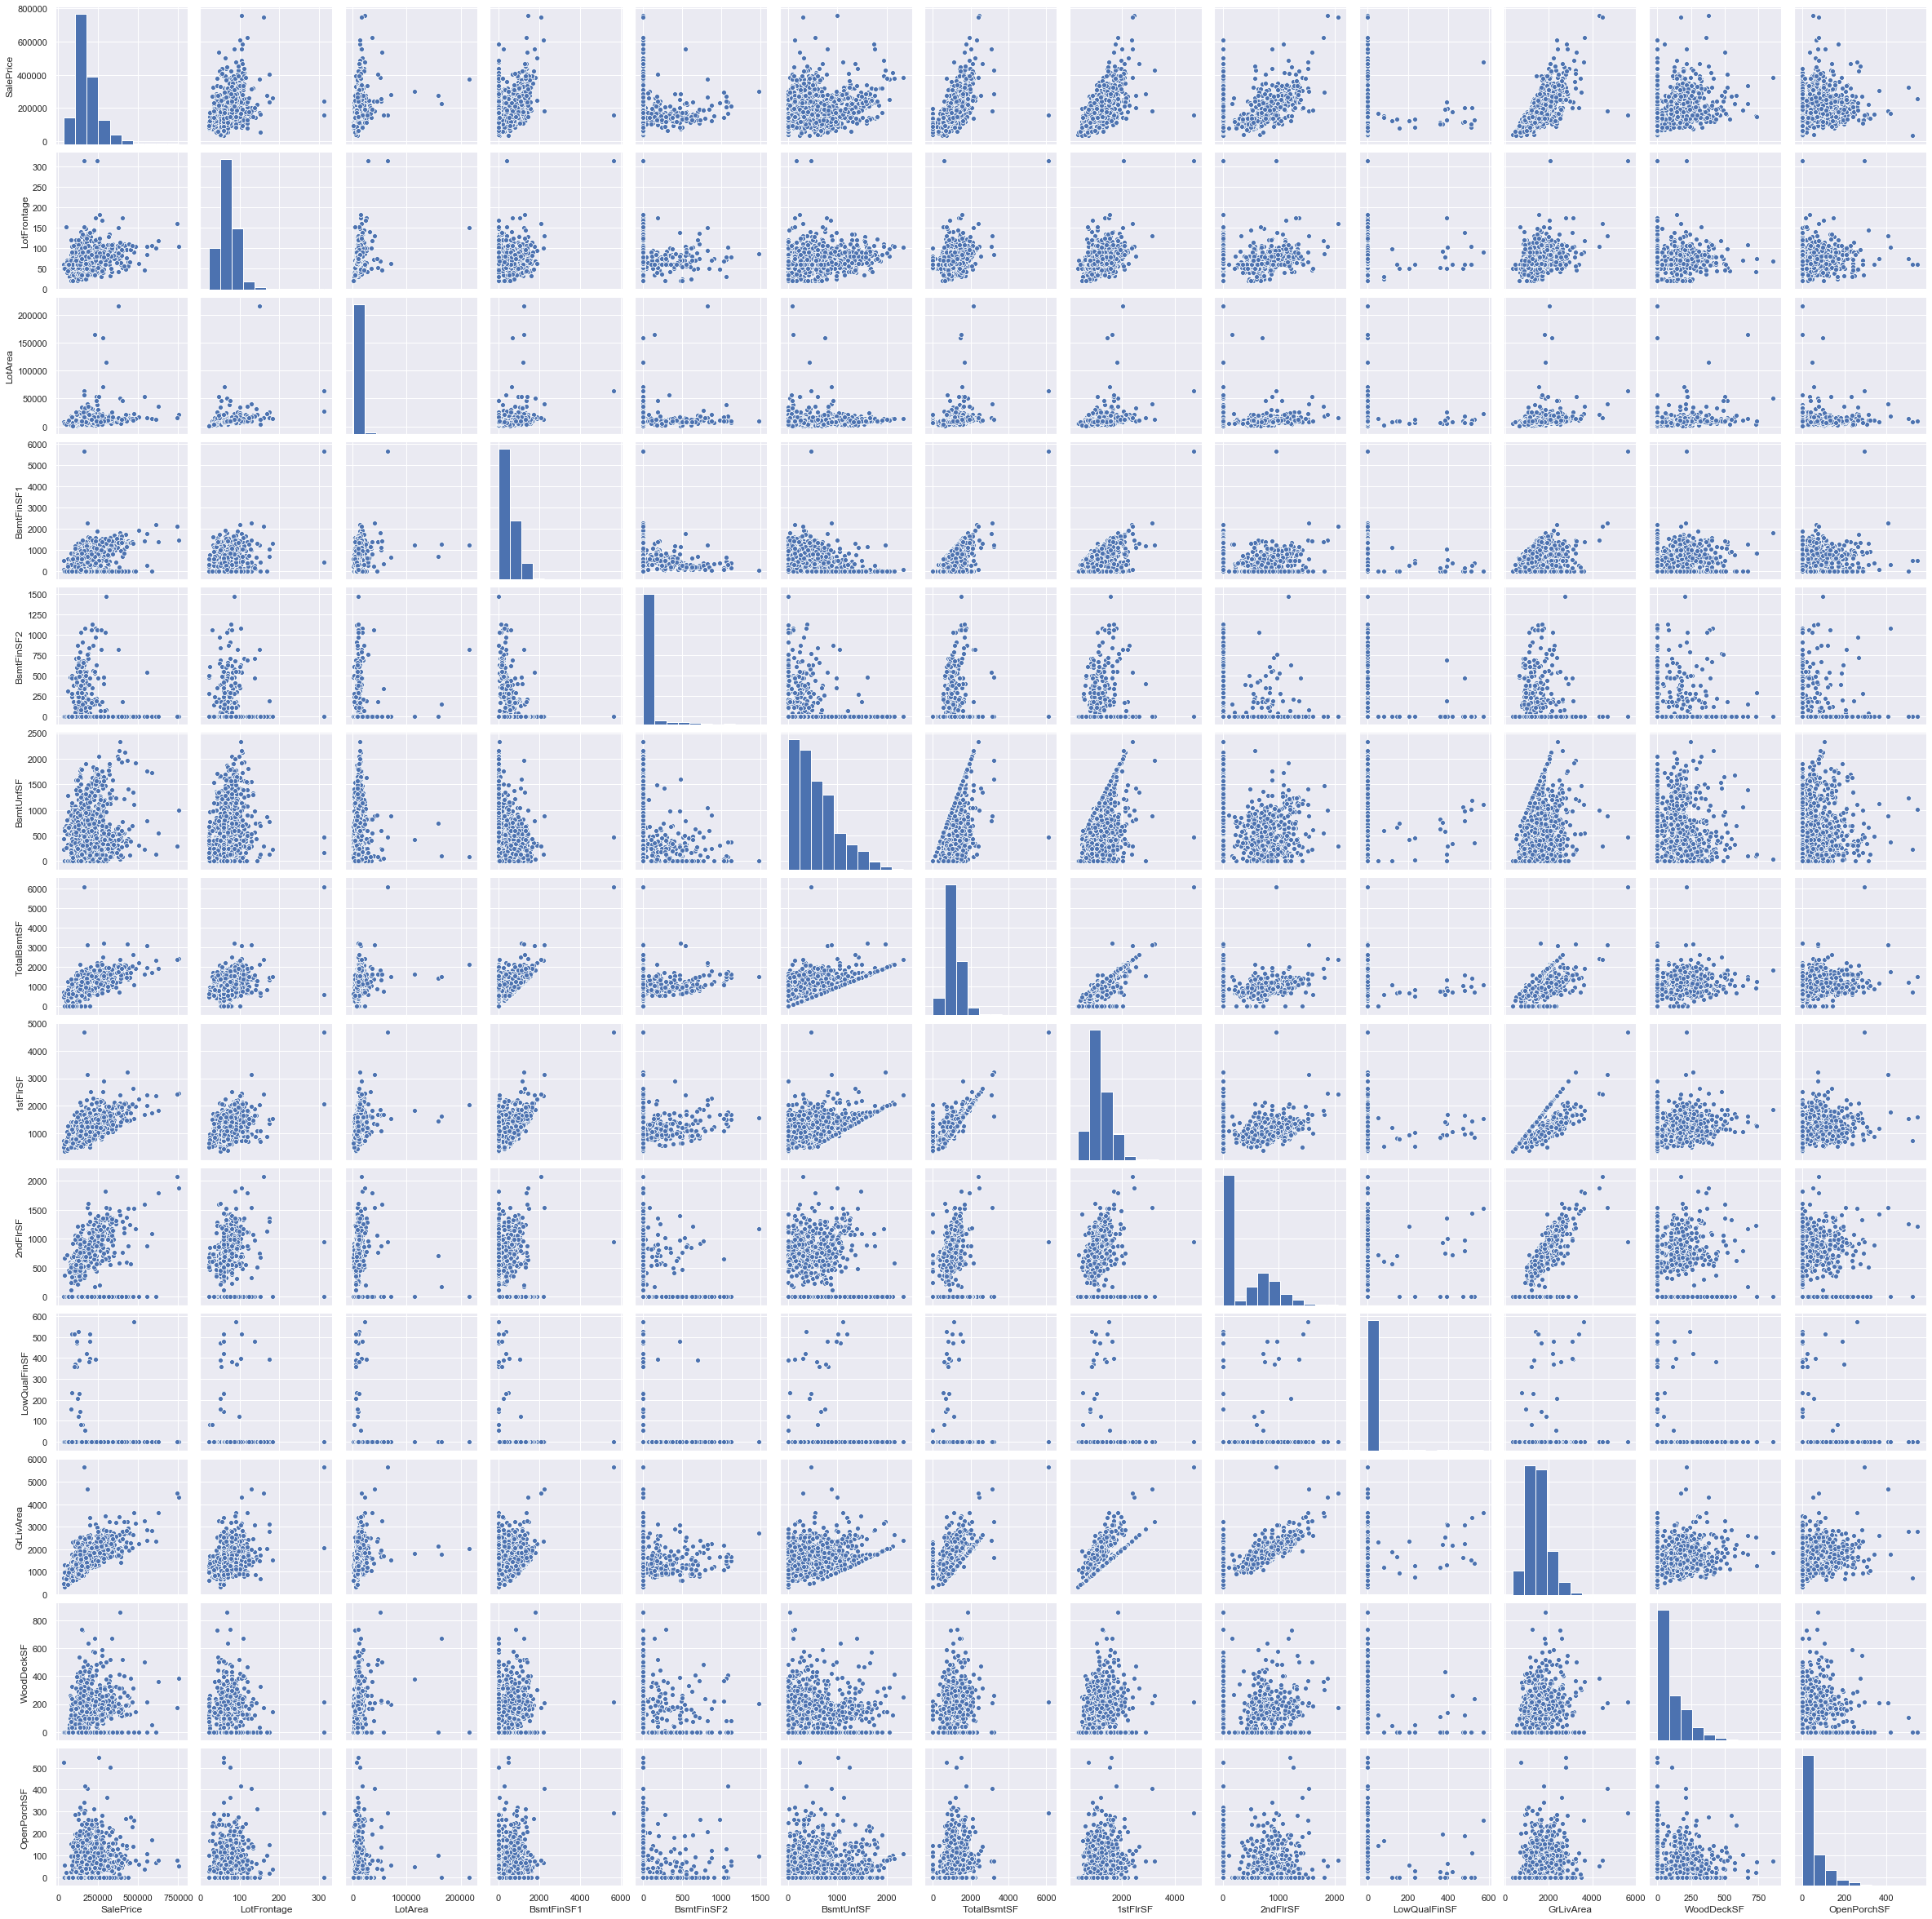

In [493]:
%matplotlib inline
area_df = attributes_with_price[area_features]
sns.pairplot(area_df)

While this isn't very scientific, we see that there is appears to be linear or exponential relations between some of the area features and the sale price. This is a good sign and means that these might be important features for use to use!

## Is there any relation between month or year sold?


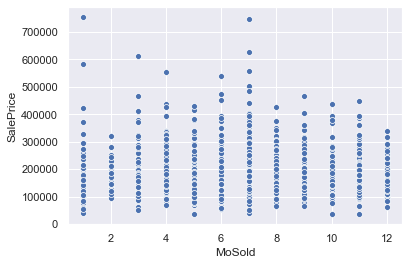

In [494]:
%matplotlib inline
sns.scatterplot(attributes_with_price['MoSold'],attributes_with_price['SalePrice'])

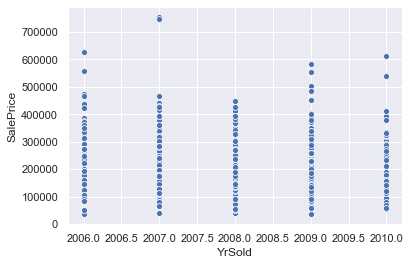

In [495]:
%matplotlib inline
sns.scatterplot(attributes_with_price['YrSold'],attributes_with_price['SalePrice'])

Doesn't really look like it. We'll drop these features when we get to feature engineering. 

# Feature Engineering
Now we can move to the feature engineering stage. Partially motivated by the above exploration, we need to do the following: 
1. Deal with all missing values 
2. Fix the skewed sale price
3. Encode all categorical and ordinal features
4. Perform some type of feature selection
5. (Possible) Feature creation
6. (Possible) normalize numerical features for better performance

## Missing values
There are a total of $19$ features missing entries. The percentages of missing entries ranges from less than $1\%$ (Electrical) to $99\%$ (PoolQC). 

Based on the above dataframe we produced in the EDA portion, we can immediately drop the features that have a large majority of missing data. Those features being: 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'. It is unlikely that we could accurately impute these missing values. 

Looking at the pairplot, we can see that their might be a relation between 'LotFrontage' and 'SalePrice'. Based on the context, we impute all missing values with $0$. 

With respect to all the garage related features, the same $81$ houses are missing these entries. They don't have a garage! 

For the basement features, we see that a very small subset of the data is missing. When looking further, we see that these entries correspond to houses without a basement evidenced by the 'TotalBsmtSF' feature being $0$. We drop these rows.

Finally, we drop the rows missing values for the following features: 'MasVnrArea','MasVnrType','Electrical'.

In [496]:
features_to_drop = ['MSSubClass','PoolQC','MiscFeature','Alley','Fence','FireplaceQu','YrSold','MoSold','MiscVal','GarageType']
attributes_with_price = attributes_with_price.drop(features_to_drop,axis=1)

attributes_with_price['LotFrontage'] = attributes_with_price['LotFrontage'].fillna(0)

Previously, this code was written such that it would drop the remaining rows that had any missing values. However, this is not something we can afford to do with the test data. As such, we impute the following columns based on their context. 

In [497]:
#Imputed based on context
attributes_with_price['MasVnrArea'] = attributes_with_price['MasVnrArea'].fillna(0)
attributes_with_price['MasVnrType'] = attributes_with_price['MasVnrType'].fillna('None')

#Imputing with mode of column
attributes_with_price['Electrical'] = attributes_with_price['Electrical'].fillna('SBrkr')

#Imputed based on context
attributes_with_price['BsmtFinType1'] = attributes_with_price['BsmtFinType1'].fillna('NA')
attributes_with_price['BsmtFinType2'] = attributes_with_price['BsmtFinType2'].fillna('NA')
attributes_with_price['BsmtQual'] = attributes_with_price['BsmtQual'].fillna('NA')
attributes_with_price['BsmtCond'] =attributes_with_price['BsmtCond'].fillna('NA')

#Imputing with mode of column
attributes_with_price['Utilities'] =attributes_with_price['Utilities'].fillna('AllPub')

#Imputed based on context
attributes_with_price['Exterior1st'] =attributes_with_price['Exterior1st'].fillna('Other')
attributes_with_price['Exterior2nd'] =attributes_with_price['Exterior2nd'].fillna('Other')
attributes_with_price['BsmtExposure'] =attributes_with_price['BsmtExposure'].fillna('No')
attributes_with_price['BsmtFinSF2'] =attributes_with_price['BsmtFinSF2'].fillna(0)
attributes_with_price['BsmtHalfBath'] =attributes_with_price['BsmtHalfBath'].fillna(0)

#Imputed based on context
attributes_with_price['GarageYrBlt'] = attributes_with_price['GarageYrBlt'].fillna(0)
attributes_with_price['GarageFinish'] = attributes_with_price['GarageFinish'].fillna('NA')
attributes_with_price['GarageQual'] = attributes_with_price['GarageQual'].fillna('NA')
attributes_with_price['GarageCond'] = attributes_with_price['GarageCond'].fillna('NA')

#Imputing with mode of column
attributes_with_price['SaleType'] = attributes_with_price['SaleType'].fillna('WD')


Let's take one more look to make sure we removed all the missing values. 

In [498]:
missing = attributes_with_price.isnull().sum().sort_values(ascending=False)
percent = (attributes_with_price.isnull().sum()/attributes_with_price.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
SalePrice,0,0.0
ExterCond,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
Foundation,0,0.0
YearRemodAdd,0,0.0


## Fixing the skewed sales price
As mentioned in the previous section, we apply a $\log$ transform to de-skew the sales price data. 

In [499]:
prices = attributes_with_price['SalePrice']
attributes = attributes_with_price.drop(['SalePrice'],axis = 1)

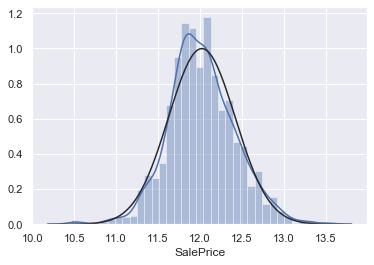

In [500]:
prices = np.log(prices)
%matplotlib inline
sns.distplot(prices,fit = norm)

That looks better!

## Fixing skewed numerical features
To get the best performance out of linear models, we want to normalize the distributions of our numerical features as much as we can. 

This is a work in progress...

For all the numerical features we have, we apply either the Box-Cox transform or the $\log$ transform to them to get them to be more "normal".

In [501]:
count_log = ['LotFrontage','LotArea','GrLivArea','TotRmsAbvGrd','1stFlrSF']

count_box = ['BsmtUnfSF','GarageArea']

for feature in count_log:
    attributes[feature] = np.log1p(attributes[feature])

lam=0.30
for feature in count_box:
    attributes[feature] = boxcox1p(attributes[feature],lam)

## Encoding Features
### 1. Ordinal Features
First, we do a label encoding on all ordinal features. The list of ordinal features we have kept is:

In [502]:
ordinal_features = ['GarageFinish','GarageQual','GarageCond','BsmtExposure','OverallQual','OverallCond','ExterQual','ExterCond',
                        'HeatingQC','KitchenQual','Functional','BsmtFinType1','BsmtFinType2','BsmtQual','BsmtCond']

In [503]:
from sklearn.preprocessing import LabelEncoder

for feature in ordinal_features:
    #initialize new instance of labelencoder
    le = LabelEncoder()
    le.fit(attributes[feature])
    attributes[feature] = le.transform(attributes[feature])

### 2. Categorical Features
Recall the list of categorical features we have:

In [504]:
categorical_features = ['MSZoning','Street','LotShape','LandContour','Utilities',
                        'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
                        'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                        'Foundation','Heating','Electrical','CentralAir','PavedDrive','SaleType',
                        'SaleCondition']

There are a lot of features to encode here. In addition there are discrepencies in the categories that appear in the train data versus the test data (for example, the 'AsbShng' value for 'Exterior1st' only appears in one of the datasets).

However, we are given complete dictionaries of all possible values for the categorical features meaning we need to fit a one-hot encoder on each of these dictionaries.

In [505]:
categorical_features = ['MSZoning','Street','LotShape','LandContour','Utilities',
                        'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
                        'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                        'Foundation','Heating','Electrical','CentralAir','PavedDrive','SaleType',
                        'SaleCondition']

MSZoning_dict=['A','C','FV','I','RH','RL','RP','RM','C (all)']

Street_dict=['Grvl','Pave']

LotShape_dict=['Reg','IR1','IR2','IR3']

LandContour_dict=['Lvl','Bnk','HLS','Low']

Utilities_dict=['AllPub','NoSewr','NoSeWa','ELO']

LotConfig_dict=['Inside','Corner','CulDSac','FR2','FR3']

LandSlope_dict=['Gtl','Mod','Sev']

Neighborhood_dict=['Blmngtn','Blueste','BrDale','BrkSide','ClearCr',
                   'CollgCr','Crawfor','Edwards','Gilbert','IDOTRR',
                   'MeadowV','Mitchel','NAmes','NoRidge','NPkVill',
                   'NridgHt','NWAmes','OldTown','SWISU','Sawyer',
                   'SawyerW','Somerst','StoneBr','Timber','Veenker']

Condition1_dict=['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe']

Condition2_dict=['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe']

BldgType_dict=['1Fam','2fmCon','Duplex','Twnhs','TwnhsE','TwnhsI']

HouseStyle_dict=['1Story','1.5Fin','1.5Unf','2Story','2.5Fin','2.5Unf','SFoyer','SLvl']

RoofStyle_dict=['Flat','Gable','Gambrel','Hip','Mansard','Shed']

RoofMatl_dict=['ClyTile','CompShg','Membran','Metal','Roll','Tar&Grv','WdShake','WdShngl']

Exterior1st_dict=['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc',
                  'MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing']

Exterior2nd_dict=['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc',
                  'MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing']

MasVnrType_dict=['BrkCmn','BrkFace','CBlock','None','Stone']

Foundation_dict=['BrkTil','CBlock','PConc','Slab','Stone','Wood']

Heating_dict=['Floor','GasA','GasW','Grav','OthW','Wall']
                 
Electrical_dict=['SBrkr','FuseA','FuseF','FuseP','Mix']
                 
CentralAir_dict = ['Y','N']
                 
PavedDrive_dict = ['Y','P','N']
                 
SaleType_dict=['WD','CWD','VWD','New','COD','Con','ConLw','ConLI','ConLD','Oth']
                 
SaleCondition_dict=['Normal','Abnorml','AdjLand','Alloca','Family','Partial']

all_dict = [MSZoning_dict,Street_dict,LotShape_dict,LandContour_dict,Utilities_dict,LotConfig_dict,LandSlope_dict,
           Neighborhood_dict,Condition1_dict,Condition2_dict,BldgType_dict,HouseStyle_dict,RoofStyle_dict,RoofMatl_dict,
           Exterior1st_dict,Exterior2nd_dict,MasVnrType_dict,Foundation_dict,Heating_dict,Electrical_dict,CentralAir_dict,
           PavedDrive_dict,SaleType_dict,SaleCondition_dict]

With all of the dictionaries defined, it is time to do the following: 
1. For each feature, initialize a OH encoder instance and fit it to the dictionary.
2. Get feature from our data and transform it.
3. Drop original feature column 
4. Join new encoded columns

In [506]:
list_keys = list(zip(categorical_features,all_dict))

In [507]:
from sklearn.preprocessing import OneHotEncoder
one_hot_df = pd.DataFrame(np.ones(1413),columns = ['tmp'])


for feature,dictionary in list_keys:
    oh = OneHotEncoder()
    oh.fit(np.array(dictionary).reshape(-1, 1))
    OH_features = oh.transform(attributes[feature].values.reshape(-1, 1))
    OH_df = pd.DataFrame.sparse.from_spmatrix(OH_features,columns = dictionary)
    
    OH_df['tmp']=1
    one_hot_df['tmp']=1
    
    attributes = attributes.drop(feature,axis =1)
    one_hot_df = one_hot_df.join(OH_df,lsuffix="_left", rsuffix="_right")
    
    one_hot_df = one_hot_df.drop('tmp_right', axis=1)
    one_hot_df = one_hot_df.drop('tmp_left', axis=1)


one_hot_df['tmp']=1

attributes['tmp']=1


attributes = attributes.join(one_hot_df,how = 'left', lsuffix="_left", rsuffix="_right")
attributes = attributes.drop('tmp_right', axis=1)
attributes = attributes.drop('tmp_left', axis=1)
attributes = attributes.fillna(0)

## Feature Selection
With all the data finally cleansed and encoded properly, we can now perform feature selection. We will try a few different methods:
1. F-test ANOVA
2. Mutual info?
3. Lasso Regression

### ANOVA
TALK ABOUT IT HERE

In [508]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestfeatures = SelectKBest(score_func=f_regression, k=100)
fit = bestfeatures.fit(attributes,prices)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(attributes.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']  
print(featureScores.nlargest(100,'Score'))  

        Attributes        Score
2      OverallQual  2930.795149
22       GrLivArea  1665.864689
35      GarageCars  1258.349043
17     TotalBsmtSF   873.710639
19        1stFlrSF   859.324452
25        FullBath   798.099817
4        YearBuilt   764.780024
7        ExterQual   747.460342
9         BsmtQual   727.554095
5     YearRemodAdd   685.840903
36      GarageArea   669.899535
30    TotRmsAbvGrd   600.153117
29     KitchenQual   582.783253
188          PConc   548.802698
32      Fireplaces   459.312902
6       MasVnrArea   324.694685
18       HeatingQC   323.080659
34    GarageFinish   307.617338
1          LotArea   277.587107
13      BsmtFinSF1   234.202850
184           None   234.018727
203         Y_left   203.612189
33     GarageYrBlt   202.233934
92          NWAmes   200.017917
52              RM   194.922128
39      WoodDeckSF   183.238072
187   CBlock_right   180.895201
178  VinylSd_right   180.159639
161   VinylSd_left   179.962300
38      GarageCond   170.642797
214     

C:\Users\Ben\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Ben\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Ben\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Ben\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


## Lasso Regression
Another possible method for feature selection we can explore is using Lasso regression. The L1 penalty ensures we have a sparse solution. 

In [509]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso


In [510]:
X_train, X_test, y_train, y_test = train_test_split(attributes, prices,train_size = 0.9, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [511]:
linlasso = Lasso(alpha = 0.005,max_iter = 10000)
linlasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [512]:
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features with non-zero weight (sorted by absolute magnitude):
	GrLivArea, 0.754
	OverallQual, 0.678
	GarageCars, 0.272
	Fireplaces, 0.137
	YearRemodAdd, 0.124
	1stFlrSF, 0.099
	Y_left, -0.080
	BsmtFinType1, -0.073
	KitchenQual, -0.073
	RM, -0.064
	BsmtQual, -0.052
	PConc, 0.038
	RP, 0.035
	HeatingQC, -0.032
	Edwards, -0.030
	IR3, -0.027
	BsmtExposure, -0.025
	Y_right, -0.024
	Normal, -0.024
	Gable, -0.021
	1Fam, 0.019
	None, -0.016
	GarageFinish, -0.009
	Norm_left, 0.008
	GarageArea, 0.007
	ExterQual, -0.006
	BsmtFullBath, 0.006


# Models
We will compare the following models on the data:
1. Regularized linear models: Ridge, Lasso, and Polynomial Regression
2. Random Forest
3. Gradient Boosted Decision Trees

We use the following code to evaluate the model and produce a .csv output file for Kaggle.

In [513]:
def Evaluate_Model(model):
    y_pred = model.predict(X_test_scaled)

    print(mean_squared_error(y_pred,y_test,squared=False))
    
    prediction_array = model.predict(attributes_test)


    housing_prices =  {'Id': house_id, 'SalePrice':np.exp(prediction_array) }
    df = pd.DataFrame(housing_prices, columns = ['Id', 'SalePrice'])


    df.to_csv('Submission.csv',index = False)

## Baseline 

It is a good idea to establish a baseline model to compare against. For this, we use standard linear regression.

In [514]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
house_id,attributes_test = finaldataloader_test.load_test()

#Evaluation and output to .csv
y_pred = linear.predict(X_test)
print(mean_squared_error(y_pred,y_test,squared=False))
prediction_array = linear.predict(attributes_test)
housing_prices =  {'Id': house_id, 'SalePrice':np.exp(prediction_array) }
df = pd.DataFrame(housing_prices, columns = ['Id', 'SalePrice'])
df.to_csv('Submission.csv',index = False)

0.12783912657477528


This is a good baseline to start with. Having this allows us to compare our models and see how they are improving.

## Lasso Regression
As mentioned above, Lasso regression automatically performs feature selection so we can immediately test it on our data and produce a first submission.

There is really only one parameter we can optimize over, alpha, the amount of regularization. We utilize $\texttt{GridSearchCV}$ to find an optimal value for alpha. 

In [515]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

lr_lasso = Lasso(max_iter = 10000)
params= {"alpha": [0.001,0.01,0.1]}

lasso_grid = GridSearchCV(lr_lasso, param_grid=params, scoring = 'neg_mean_squared_error', cv=5,n_jobs=-1)
lasso_grid.fit(X_train_scaled,y_train)

print(np.sqrt(-lasso_grid.best_score_))
print(lasso_grid.best_params_)


lr_lasso.set_params(**lasso_grid.best_params_)
lr_lasso.fit(X_train_scaled,y_train)



import finaldataloader_test
house_id,attributes_test = finaldataloader_test.load_test()
attributes_scaled_test = scaler.transform(attributes_test)

#Evaluation and output to .csv
y_pred = lr_lasso.predict(X_test_scaled)
print(mean_squared_error(y_pred,y_test,squared=False))
prediction_array = lr_lasso.predict(attributes_scaled_test)
housing_prices =  {'Id': house_id, 'SalePrice':np.exp(prediction_array) }
df = pd.DataFrame(housing_prices, columns = ['Id', 'SalePrice'])
df.to_csv('Submission.csv',index = False)

0.13098799235341052
{'alpha': 0.001}
0.11616806531826157


## Lasso Regression with Polynomial Features

Already this is looking much better but there is a lot to improve. Building on this, we can implement degree two polynomial regression (anything higher than degree two probably isn't worth exploring due to how likely it is for the data to overfit).

In [476]:
scaler = MinMaxScaler()
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

#Polynomial transform on the data
X_poly_train = poly.fit_transform(attributes)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(attributes, prices)

X_train_scaled_poly = scaler.fit_transform(X_train_poly)
X_test_scaled_poly = scaler.transform(X_test_poly)

#initializing grid of parameters to search
lr_lasso_poly = Lasso(max_iter = 10000)
params= {"alpha": [0.001,0.002,0.1]}

lasso_grid = GridSearchCV(lr_lasso_poly, param_grid=params, scoring = 'neg_mean_squared_error', cv=5,n_jobs=-1)
lasso_grid.fit(X_train_scaled_poly,y_train_poly)

print(np.sqrt(-lasso_grid.best_score_))
print(lasso_grid.best_params_)

lr_lasso_poly.set_params(**lasso_grid.best_params_)
lr_lasso_poly.fit(X_train_scaled_poly,y_train_poly)
X_poly_predict = poly.fit_transform(attributes)
X_poly_predict_scaled  = scaler.fit_transform(X_poly_predict)


#Evaluation and output to .csv
import finaldataloader_test
house_id,attributes_test = finaldataloader_test.load_test()
X_poly_predict = poly.fit_transform(attributes_test)
X_poly_predict_scaled  = scaler.fit_transform(X_poly_predict)
y_pred = lr_lasso_poly.predict(X_test_scaled)

print(mean_squared_error(y_pred,y_test,squared=False))
prediction_array = lr_lasso_poly.predict(attributes_scaled_test)
housing_prices =  {'Id': house_id, 'SalePrice':np.exp(prediction_array) }
df = pd.DataFrame(housing_prices, columns = ['Id', 'SalePrice'])
df.to_csv('Submission.csv',index = False)




0.13839968620518373
{'alpha': 0.001}
0.10955513711066972


While this is still an improvement in score on our test data, not that there we have a fairly large difference in our train and test scores. This model is overfitting already even with degree two polynomials and it would be unwise to continue with higher degrees.

## Model Evaluation
The model (and Kaggle submissions) are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.